In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/차별금지법(59,421건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '뉴스-인기순'))
    return df

news_popular = load_all_data()

## 뉴스-인기순 Sheet

In [4]:
news_popular.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4    15
dtype: int64

In [5]:
news_popular.columns = news_popular.iloc[0]
news_popular.drop(0, inplace=True, axis=0)
news_popular = news_popular.dropna(axis=0, how='any')
news_popular = news_popular[~news_popular['내용'].str.contains('http')]
news_popular = news_popular[news_popular['내용'].str.contains('[가-힣]')]
news_popular = news_popular[news_popular['내용'].str.len() < 1000]

print(news_popular.shape)
news_popular.head()

(3999, 5)


,작성일,작성자,댓글수,제목,내용
1,2020/07/20,조선일보,8744,어? 갑자기 왜 사람들이 '문재인 내려와'를 검색하죠?,'문재인 내려와'. 20일 오후 포털사이트 네이버 실시간 급상승 검색어에 이런 내용...
9,2020/11/20,연합뉴스,3496,"진선미 ""아파트 환상 버려야…임대로 주거 질 실현 확신""(종합)","임대차3법 보완 지적엔 ""제도 안착 시간 필요…어려움 겪는 분들께 죄송"" 민주당 진..."
17,2020/11/20,조선일보,3108,與진선미 “아파트 환상 버리면 임대주택으로도 충분히 주거 질 확보”,임대주택 둘러본 뒤 “내 아파트와 전혀 차이 없다” 더불어민주당 미래주거추진단 진선...
18,2020/07/25,국민일보,3259,“나라가 니꺼냐” 촛불 정부 앞에 ‘부동산 촛불’ 켜진다,"부동산 대책 피해자 모임, 25일 저녁 7시부터 집회 ‘촛불 정부’를 자임하는 문재..."
22,2020/12/04,조선일보,2701,[단독]신임 국토부장관 “현정부 주거복지 최고”,변창흠내정자 최근 발언 “비판여론 박탈감때문” “이전 정부 비해 제일 잘해” ...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_news_popular = tfdif(news_popular['내용'])

In [8]:
tfidf_news_popular

,10,10월,10일,11,12,12월,13,13일,14,16,...,홍남기 부총리,확대,회의에서,효과가,효과를,후보,후보가,후보는,후보자는,후속
0,0.064938,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.153166,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.170484,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.130518,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.000000,0.000000,0.0,0.000000,0.132036,0.0,0.0,0.0,0.0,0.0,...,0.0,0.118056,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3995,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3996,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3997,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
import pickle

tfidf_news_popular.to_pickle('/tfidf_news_popular.pkl')

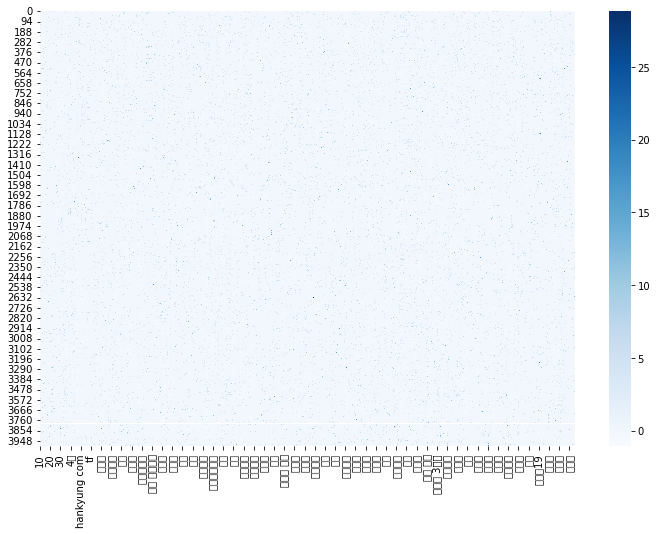

In [10]:
tfidf_news_popular = (tfidf_news_popular - tfidf_news_popular.mean()) / tfidf_news_popular.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_news_popular, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above